# Delayed Flights: A Machine Learning Solution

This Notebook contains data from flights around the USA. The goal is to create a Machine Learning model that predicts succesfully the flights that have important delays (60> minutes) and interpret the results. 

##### Imports

In [3]:
# Data loading and overview

import numpy as np
import pandas as pd

# Data visualization

import seaborn as sns
import matplotlib.pyplot as plt

# Data oversampling techniques

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

# Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
flights = pd.read_csv('./flights14_sample.csv')

## 1. Data overview

In [6]:
# Data overview.

print(flights.head())
num_rows = flights.shape[0]
print("Número de filas en el dataset:", num_rows)
print(flights.dtypes)

# Adding new variable "important_delay", for flights with over 60 minutes of delay.

flights['important_delay'] = flights['arr_delay'] > 60

# Flights with delays of 60> minutes and 60< minutes.

important_delay_count = flights['important_delay'].sum()
print("Number of flights delayed:", important_delay_count)

flights_not_delayed = (flights['important_delay'] == False).sum()
print("Number of flights not delayed:", flights_not_delayed)

   Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0      238667  2014     10   14      1029        -10      1232        -36   
1      143280  2014      6   26      2044         -6      2342        -17   
2      107838  2014      5   15      1456          1      1654         24   
3      148874  2014      7    2       803         -2      1047        -15   
4      239608  2014     10   15       854         -6      1204          0   

   cancelled carrier tailnum  flight origin dest  air_time  distance  hour  \
0          0      UA  N474UA     395    EWR  LAS       278      2227    10   
1          0      B6  N639JB    1205    JFK  PDX       315      2454    20   
2          0      MQ  N505MQ    3295    JFK  RDU        68       427    14   
3          0      DL  N341NB    2395    LGA  PBI       139      1035     8   
4          0      UA  N18112     130    EWR  LAX       316      2454     8   

   min  
0   29  
1   44  
2   56  
3    3  
4   54  
Número de fila

##### Density function of flights with 60> minutes of delay

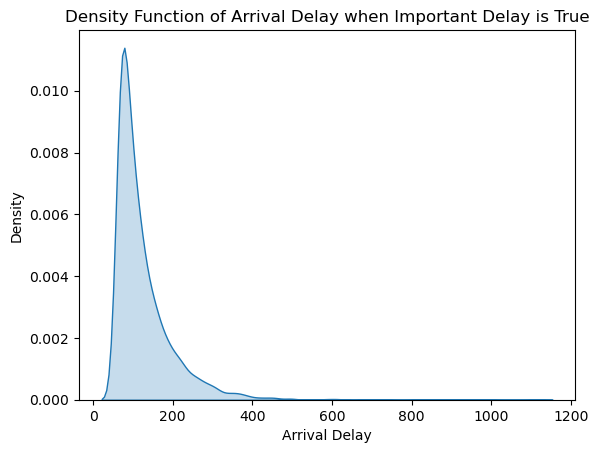

In [8]:
filtered_flights = flights[flights['important_delay'] == True]

sns.kdeplot(filtered_flights['arr_delay'], fill=True)
plt.title('Density Function of Arrival Delay when Important Delay is True')
plt.xlabel('Arrival Delay')
plt.ylabel('Density')
plt.show()

## 2. Oversampling techniques: SMOTE and ADASYN

The dataset is highly unbalanced in terms of classes of the objective variable. Flights with important delays (60> minutes) is the minority class, representing around 8,8% of the data. Great imbalances train inaccurate ML models. To prevent this, we will create new synthetic data using oversampling techniques SMOTE and ADASYN.


##### 2.1. SMOTE


In [11]:
X = flights.drop('important_delay', axis=1)  
y = flights['important_delay']  

X_encoded = pd.get_dummies(X, columns=['carrier', 'tailnum', 'origin', 'dest'], drop_first=True)

smote = SMOTE(random_state=42)
X_resampled_SMOTE, y_resampled_SMOTE = smote.fit_resample(X_encoded, y)

# Data resampling checking

print(y.value_counts())
print("Original dataset shape:", X.shape)
print("Resampled dataset shape:", X_resampled_SMOTE.shape)

important_delay
False    76807
True      6787
Name: count, dtype: int64
Original dataset shape: (83594, 18)
Resampled dataset shape: (153614, 3744)


##### 2.2. ADASYN

In [13]:
X = flights.drop('important_delay', axis=1)
y = flights['important_delay']

X_encoded = pd.get_dummies(X, columns=['carrier', 'tailnum', 'origin', 'dest'], drop_first=True)

adasyn = ADASYN(random_state=42)
X_resampled_ADASYN, y_resampled_ADASYN = adasyn.fit_resample(X_encoded, y)

# Data resampling checking

print(y.value_counts())
print("Original dataset shape:", X.shape)
print("Resampled dataset shape:", X_resampled_ADASYN.shape)

important_delay
False    76807
True      6787
Name: count, dtype: int64
Original dataset shape: (83594, 18)
Resampled dataset shape: (155429, 3744)


## 3. ML Model: Random Forest Classifier

A Random Forest classifier has been chosen to study how accurate a Machine Learning model can predict flights with important delays (60> minutes). There will be two models: the first one with two features and the second with three features. The objective is to compare how different meaningful features affect the prediction capabilities of the model. 

##### 3.1. Random Forest classifier and data preparation

In [16]:
def evaluate_random_forest(X_resampled, y_resampled, n_estimators=100):

    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=42)
    
    rf_model = RandomForestClassifier(random_state=42)
    
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    return rf_model

# Model 1: With two features

features1 = ['distance', 'dep_time']

# Data preparation 1

# SMOTE
X_smote_1 = X_resampled_SMOTE[features1]
y_smote_1 = y_resampled_SMOTE

# ADASYN
X_adasyn_1 = X_resampled_ADASYN[features1]
y_adasyn_1 = y_resampled_ADASYN


# Model 2: With three features

features2 = ['distance', 'dep_time', 'air_time']

# Data preparation 2

# SMOTE
X_smote_2 = X_resampled_SMOTE[features2]
y_smote_2 = y_resampled_SMOTE

# ADASYN
X_adasyn_2 = X_resampled_ADASYN[features2]
y_adasyn_2 = y_resampled_ADASYN


##### 3.2. Model evaluations and features importance

##### Model 1: Evaluations

In [19]:
# SMOTE

print("Results for SMOTE Resampled Data:")
evaluate_random_forest(X_smote_1, y_smote_1)

# ADASYN

print("\nResults for ADASYN Resampled Data:")
evaluate_random_forest(X_adasyn_1, y_adasyn_1)

Results for SMOTE Resampled Data:
Confusion Matrix:
[[17405  1688]
 [ 2587 16724]]

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     19093
        True       0.91      0.87      0.89     19311

    accuracy                           0.89     38404
   macro avg       0.89      0.89      0.89     38404
weighted avg       0.89      0.89      0.89     38404


Results for ADASYN Resampled Data:
Confusion Matrix:
[[17461  1680]
 [ 2745 16972]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.91      0.89     19141
        True       0.91      0.86      0.88     19717

    accuracy                           0.89     38858
   macro avg       0.89      0.89      0.89     38858
weighted avg       0.89      0.89      0.89     38858



RandomForestClassifier(random_state=42)

##### Model 1: Features importance

##### SMOTE

In [22]:
rf_model_1_smote = evaluate_random_forest(X_smote_1, y_smote_1)

importancia_caracteristicas_1_smote = rf_model_1_smote.feature_importances_
distance_importance_1_smote = importancia_caracteristicas_1_smote[0]
dep_time_importance_1_smote = importancia_caracteristicas_1_smote[1]

print("Feature importance - Distance:", distance_importance_1_smote)
print("Feature importance - Departure time:", dep_time_importance_1_smote)

Confusion Matrix:
[[17405  1688]
 [ 2587 16724]]

Classification Report:
              precision    recall  f1-score   support

       False       0.87      0.91      0.89     19093
        True       0.91      0.87      0.89     19311

    accuracy                           0.89     38404
   macro avg       0.89      0.89      0.89     38404
weighted avg       0.89      0.89      0.89     38404

Feature importance - Distance: 0.5016278866297154
Feature importance - Departure time: 0.49837211337028464


##### ADASYN

In [24]:
rf_model_1_adasyn = evaluate_random_forest(X_adasyn_1, y_adasyn_1)

importancia_caracteristicas_1_adasyn = rf_model_1_adasyn.feature_importances_
distance_importance_1_adasyn = importancia_caracteristicas_1_adasyn[0]
dep_time_importance_1_adasyn = importancia_caracteristicas_1_adasyn[1]

print("Feature importance - Distance:", distance_importance_1_adasyn)
print("Feature importance - Departure time:", dep_time_importance_1_adasyn)

Confusion Matrix:
[[17461  1680]
 [ 2745 16972]]

Classification Report:
              precision    recall  f1-score   support

       False       0.86      0.91      0.89     19141
        True       0.91      0.86      0.88     19717

    accuracy                           0.89     38858
   macro avg       0.89      0.89      0.89     38858
weighted avg       0.89      0.89      0.89     38858

Feature importance - Distance: 0.5174893698595151
Feature importance - Departure time: 0.48251063014048495


##### Model 2: Evaluations

In [26]:
# SMOTE

print("Results for SMOTE Resampled Data:")
evaluate_random_forest(X_smote_2, y_smote_2)

# ADASYN

print("\nResults for ADASYN Resampled Data:")
evaluate_random_forest(X_adasyn_2, y_adasyn_2)

Results for SMOTE Resampled Data:
Confusion Matrix:
[[17386  1707]
 [ 2452 16859]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89     19093
        True       0.91      0.87      0.89     19311

    accuracy                           0.89     38404
   macro avg       0.89      0.89      0.89     38404
weighted avg       0.89      0.89      0.89     38404


Results for ADASYN Resampled Data:
Confusion Matrix:
[[17332  1809]
 [ 2454 17263]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89     19141
        True       0.91      0.88      0.89     19717

    accuracy                           0.89     38858
   macro avg       0.89      0.89      0.89     38858
weighted avg       0.89      0.89      0.89     38858



RandomForestClassifier(random_state=42)

##### Model 2: Features importance

##### SMOTE

In [29]:
rf_model_2_smote = evaluate_random_forest(X_smote_2, y_smote_2)

importancia_caracteristicas_2_smote = rf_model_2_smote.feature_importances_
distance_importance_2_smote = importancia_caracteristicas_2_smote[0]
dep_time_importance_2_smote = importancia_caracteristicas_2_smote[1]
air_time_importance_2_smote = importancia_caracteristicas_2_smote[2]

print("Feature importance - Distance:", distance_importance_2_smote)
print("Feature importance - Departure time:", dep_time_importance_2_smote)
print("Feature importance - Air time:", air_time_importance_2_smote)

Confusion Matrix:
[[17386  1707]
 [ 2452 16859]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89     19093
        True       0.91      0.87      0.89     19311

    accuracy                           0.89     38404
   macro avg       0.89      0.89      0.89     38404
weighted avg       0.89      0.89      0.89     38404

Feature importance - Distance: 0.3867413999611358
Feature importance - Departure time: 0.4708473544199298
Feature importance - Air time: 0.14241124561893442


##### ADASYN

In [31]:
rf_model_2_adasyn = evaluate_random_forest(X_adasyn_2, y_adasyn_2)

importancia_caracteristicas_2_adasyn = rf_model_2_adasyn.feature_importances_
distance_importance_2_adasyn = importancia_caracteristicas_2_adasyn[0]
dep_time_importance_2_adasyn = importancia_caracteristicas_2_adasyn[1]
air_time_importance_2_adasyn = importancia_caracteristicas_2_adasyn[2]

print("Feature importance - Distance:", distance_importance_2_adasyn)
print("Feature importance - Departure time:", dep_time_importance_2_adasyn)
print("Feature importance - Air time:", air_time_importance_2_adasyn)

Confusion Matrix:
[[17332  1809]
 [ 2454 17263]]

Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.91      0.89     19141
        True       0.91      0.88      0.89     19717

    accuracy                           0.89     38858
   macro avg       0.89      0.89      0.89     38858
weighted avg       0.89      0.89      0.89     38858

Feature importance - Distance: 0.39995486525022006
Feature importance - Departure time: 0.4551666154134656
Feature importance - Air time: 0.14487851933631435


## 4. Conclusions

While the model performs at a good level in all possibilities, the Random Forest classifier performs better with **three features** using the dataset from the **SMOTE technique**. The reason behind it is not only the accuracy (89%) of the model, but the balance between false negatives and false positives.

About feature importance, **departure time** seems to be the most relevant variable to predict if a flight will be delayed. When the model is increased the number of features by one, departure time barely loses relevance to explain the model. 